<a href="https://colab.research.google.com/github/JasmineGonzalez2021/Computational-Modeling/blob/master/PROTOTYPE_Jasmine_COVID_19_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

This COVID-19 project examines ????. It also looks at ????.

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
import urllib
import os
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
import mpl_toolkits.mplot3d.axes3d as p3
import colorsys
from PIL import Image
from urllib.request import urlopen
from six.moves import urllib
from google.colab import drive
from operator import itemgetter 
import seaborn as sns
import math as math
from matplotlib.image import imread

The below code is taken directly from KK's Colab for Q2, which can be found [here](https://colab.research.google.com/drive/1-Wue8f3_4Eexl1VUD2iLhsDwV8U4-2KW).

In [0]:
%%time 
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes 
import os
import geopandas as gpd

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [857 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [832 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.

The  datasets shown below are two different sub-files from the larger zip file contained in the download of this [data from Kaggle](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset) that summarizes affected cases of victims of coronavirus. The site says that the dataset is updated daily, but since I downloaded it to my computer than uploaded it to GitHub for easy access, the information is only current up through the dataset as it was at 2:38 PM PST on 3.17.2020.

In [0]:
df1 = pd.read_csv("https://raw.githubusercontent.com/JasmineGonzalez2021/Computational-Modeling/master/COVID19_line_list_data.csv")
df1

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...,NaN,NaN,NaN,NaN,NaN,NaN
1081,1082,1.0,2/24/2020,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...,NaN,NaN,NaN,NaN,NaN,NaN
1082,1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,NaN,NaN,NaN,2/17/2020,0,0.0,0,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...,NaN,NaN,NaN,NaN,NaN,NaN
1083,1084,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,NaN,NaN,2/19/2020,2/21/2020,0,0.0,0,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df2 = pd.read_csv("https://raw.githubusercontent.com/JasmineGonzalez2021/Computational-Modeling/master/COVID19_open_line_list.csv")
df2

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Wuhan,NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,"Luzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,"Yinzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,NaN,NaN,contacted with confirmed case,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,Wuhan,NaN,"06.01.2020 went to Wuhan, 07.01.2020 returned ...",NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Random work

In [0]:
df1_countries = df1['country'].unique()
df1_countries

array(['China', 'France', 'Japan', 'Malaysia', 'Nepal', 'Singapore',
       'South Korea', 'Taiwan', 'Thailand', 'USA', 'Vietnam', 'Australia',
       'Canada', 'Cambodia', 'Sri Lanka', 'Germany', 'UAE', 'Hong Kong',
       'Italy', 'Russia', 'UK', 'India', 'Phillipines', 'Finland',
       'Spain', 'Sweden', 'Belgium', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Kuwait', 'Bahrain', 'Austria', 'Afghanistan', 'Algeria',
       'Croatia', 'Switzerland'], dtype=object)

In [0]:
df2_countries = df2['country'].unique()
df2_countries

array(['China', 'France', 'Japan', 'Malaysia', 'Nepal', 'Singapore',
       'South Korea', nan, 'Thailand', 'United States', 'Vietnam',
       'Australia', 'Canada', 'Cambodia', 'Sri Lanka', 'Germany',
       'United Arab Emirates', 'Finland', 'Philippines', 'India', 'Italy',
       'United Kingdom', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Egypt',
       'Iran', 'Lebanon', 'North Macedonia', 'Kuwait', 'Pakistan',
       'Greece', 'Oman', 'Afghanistan', 'Algeria', 'Switzerland',
       'Austria', 'Brazil', 'Romania', 'Norway', 'Georgia', 'Iraq',
       'Bahrain', 'Croatia', 'Nigeria', 'Netherlands', 'Estonia',
       'Israel', 'San Marino', 'Lithuania', 'Ecuador'], dtype=object)

In [0]:
print(len(df1_countries))
print(len(df2_countries))

38
52


In [0]:
row = df2[4:5]
row['country']

4    China
Name: country, dtype: object

In [0]:
for entry in range(5):
  row = df2[entry - 1:entry]
  print(row['country'])

Series([], Name: country, dtype: object)
0    China
Name: country, dtype: object
1    China
Name: country, dtype: object
2    China
Name: country, dtype: object
3    China
Name: country, dtype: object


In [0]:
truths = []
for entry in df2_countries:
  for item in range(14126):
    row = df2[item - 1:item]
    if row['country'].any == entry:
      country_name = row['country']
      truths.append(str(country_name))
truths

In [0]:
china_cases = 0
 for item in range(14126):
    row = df2[item - 1:item]
    if row['country'] == 'China':
      china_cases = china_cases + 1
china_cases

#3.19.2020

In [0]:
df2_countries = df2['country'].unique()
df2_countries

array(['China', 'France', 'Japan', 'Malaysia', 'Nepal', 'Singapore',
       'South Korea', nan, 'Thailand', 'United States', 'Vietnam',
       'Australia', 'Canada', 'Cambodia', 'Sri Lanka', 'Germany',
       'United Arab Emirates', 'Finland', 'Philippines', 'India', 'Italy',
       'United Kingdom', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Egypt',
       'Iran', 'Lebanon', 'North Macedonia', 'Kuwait', 'Pakistan',
       'Greece', 'Oman', 'Afghanistan', 'Algeria', 'Switzerland',
       'Austria', 'Brazil', 'Romania', 'Norway', 'Georgia', 'Iraq',
       'Bahrain', 'Croatia', 'Nigeria', 'Netherlands', 'Estonia',
       'Israel', 'San Marino', 'Lithuania', 'Ecuador'], dtype=object)

In [0]:
def count_countries(dataframe):
  ChinaCount = 0
  FranceCount = 0
  JapanCount = 0
  MalaysiaCount = 0
  NepalCount = 0
  SingaporeCount = 0
  SouthKoreaCount = 0
  ThailandCount = 0
  UnitedStatesCount = 0
  VietnamCount = 0
  AustraliaCount = 0
  CanadaCount = 0
  CambodiaCount = 0
  SriLankaCount = 0
  GermanyCount = 0
  UnitedArabEmiratesCount = 0
  FinlandCount = 0
  PhilippinesCount = 0
  IndiaCount = 0
  ItalyCount = 0
  UnitedKingdomCount = 0
  RussiaCount = 0
  SwedenCount = 0
  SpainCount = 0
  BelgiumCount = 0
  EgyptCount = 0
  IranCount = 0
  LebanonCount = 0
  NorthMacedoniaCount = 0
  KuwaitCount = 0
  PakistanCount = 0
  GreeceCount = 0
  OmanCount = 0
  AfghanistanCount = 0
  AlgeriaCount = 0
  SwitzerlandCount = 0
  AustriaCount = 0
  BrazilCount = 0
  RomaniaCount = 0
  NorwayCount = 0
  GeorgiaCount = 0
  IraqCount = 0
  BahrainCount = 0
  CroatiaCount = 0
  NigeriaCount = 0
  NetherlandsCount = 0
  EstoniaCount = 0
  IsraelCount = 0
  SanMarinoCount = 0
  LithuaniaCount = 0
  EcuadorCount = 0
  for item in dataframe['country']:
    if item == "China":
      ChinaCount = ChinaCount + 1
    elif item == "France":
      FranceCount = FranceCount + 1    
    elif item == "Japan":
      JapanCount = JapanCount + 1    
    elif item == "Malaysia":
      MalaysiaCount = MalaysiaCount + 1
    elif item == "Nepal":
      NepalCount = NepalCount + 1    
    elif item == "Singapore":
      SingaporeCount = SingaporeCount + 1    
    elif item == "South Korea":
      SouthKoreaCount = SouthKoreaCount + 1    
    elif item == "Thailand":
      ThailandCount = ThailandCount + 1    
    elif item == "United States":
      UnitedStatesCount = UnitedStatesCount + 1    
    elif item == "Vietnam":
      VietnamCount = VietnamCount + 1   
    elif item == "Australia":
      AustraliaCount = AustraliaCount + 1
    elif item == "Canada":
      CanadaCount = CanadaCount + 1
    elif item == "Cambodia":
      CambodiaCount = CambodiaCount + 1
    elif item == "Sri Lanka":
      SriLankaCount = SriLankaCount + 1
    elif item == "Germany":
      GermanyCount = GermanyCount + 1 
    elif item == "United Arab Emirates":
      UnitedArabEmiratesCount = UnitedArabEmiratesCount + 1
    elif item == "Finland":
      FinlandCount = FinlandCount + 1
    elif item == "Philippines":
      PhilippinesCount = PhilippinesCount + 1
    elif item == "India":
      IndiaCount = IndiaCount + 1
    elif item == "Italy":
      ItalyCount = ItalyCount + 1
    elif item == "United Kingdom":
      UnitedKingdomCount = UnitedKingdomCount + 1
    elif item == "Russia":
      RussiaCount = RussiaCount + 1
    elif item == "Sweden":
      SwedenCount = SwedenCount + 1
    elif item == "Spain":
      SpainCount = SpainCount + 1
    elif item == "Belgium":
      BelgiumCount = BelgiumCount + 1
    elif item == "Egypt":
      EgyptCount = EgyptCount + 1
    elif item == "Iran":
      IranCount = IranCount + 1
    elif item == "Lebanon":
      LebanonCount = LebanonCount + 1
    elif item == "North Macedonia":
      NorthMacedoniaCount = NorthMacedoniaCount + 1
    elif item == "Kuwait":
      KuwaitCount = KuwaitCount + 1
    elif item == "Pakistan":
      PakistanCount = PakistanCount + 1
    elif item == "Greece":
      GreeceCount = GreeceCount + 1
    elif item == "Oman":
      OmanCount = OmanCount + 1
    elif item == "Afghanistan":
      AfghanistanCount = AfghanistanCount + 1
    elif item == "Algeria":
      AlgeriaCount = AlgeriaCount + 1
    elif item == "Switzerland":
      SwitzerlandCount = SwitzerlandCount + 1
    elif item == "Austria":
      AustriaCount = AustriaCount + 1
    elif item == "Brazil":
      BrazilCount = BrazilCount + 1
    elif item == "Romania":
      RomaniaCount = RomaniaCount + 1
    elif item == "Norway":
      NorwayCount = NorwayCount + 1
    elif item == "Georgia":
      GeorgiaCount = GeorgiaCount + 1
    elif item == "Iraq":
      IraqCount = IraqCount + 1
    elif item == "Bahrain":
      BahrainCount = BahrainCount + 1
    elif item == "Croatia":
      CroatiaCount = CroatiaCount + 1
    elif item == "Nigeria":
      NigeriaCount = NigeriaCount + 1
    elif item == "Netherlands":
      NetherlandsCount = NetherlandsCount + 1
    elif item == "Estonia":
      EstoniaCount = EstoniaCount + 1
    elif item == "Israel":
      IsraelCount = IsraelCount + 1
    elif item == "San Marino":
      SanMarinoCount = SanMarinoCount + 1
    elif item == "Lithuania":
      LithuaniaCount = LithuaniaCount + 1
    elif item == "Ecuador":
      EcuadorCount = EcuadorCount + 1  
  print(ChinaCount, FranceCount, JapanCount, MalaysiaCount, NepalCount, SingaporeCount, SouthKoreaCount, ThailandCount, UnitedStatesCount, VietnamCount, AustraliaCount, CanadaCount, CambodiaCount, SriLankaCount, GermanyCount, UnitedArabEmiratesCount, FinlandCount, PhilippinesCount, IndiaCount, ItalyCount, UnitedKingdomCount, RussiaCount, SwedenCount, SpainCount, BelgiumCount, EgyptCount, IranCount, LebanonCount, NorthMacedoniaCount, KuwaitCount, PakistanCount, GreeceCount, OmanCount, AfghanistanCount, AlgeriaCount, SwitzerlandCount, AustriaCount, BrazilCount, RomaniaCount, NorwayCount, GeorgiaCount, IraqCount, BahrainCount, CroatiaCount, NigeriaCount, NetherlandsCount, EstoniaCount, IsraelCount, SanMarinoCount, LithuaniaCount, EcuadorCount)
    #else:
      #print(item)

In [0]:
count_countries(df2[['country']])

10446 19 731 17 1 91 938 40 17 16 15 10 1 1 20 20 2 3 3 588 12 2 9 13 1 1 28 3 1 26 2 1 6 1 1 10 2 1 3 4 2 6 20 3 1 2 1 4 1 1 1


#3.20.2020

In [0]:
ChinaCount = 0
FranceCount = 0
JapanCount = 0
MalaysiaCount = 0
NepalCount = 0
SingaporeCount = 0
SouthKoreaCount = 0
ThailandCount = 0
UnitedStatesCount = 0
VietnamCount = 0
AustraliaCount = 0
CanadaCount = 0
CambodiaCount = 0
SriLankaCount = 0
GermanyCount = 0
UnitedArabEmiratesCount = 0
FinlandCount = 0
PhilippinesCount = 0
IndiaCount = 0
ItalyCount = 0
UnitedKingdomCount = 0
RussiaCount = 0
SwedenCount = 0
SpainCount = 0
BelgiumCount = 0
EgyptCount = 0
IranCount = 0
LebanonCount = 0
NorthMacedoniaCount = 0
KuwaitCount = 0
PakistanCount = 0
GreeceCount = 0
OmanCount = 0
AfghanistanCount = 0
AlgeriaCount = 0
SwitzerlandCount = 0
AustriaCount = 0
BrazilCount = 0
RomaniaCount = 0
NorwayCount = 0
GeorgiaCount = 0
IraqCount = 0
BahrainCount = 0
CroatiaCount = 0
NigeriaCount = 0
NetherlandsCount = 0
EstoniaCount = 0
IsraelCount = 0
SanMarinoCount = 0
LithuaniaCount = 0
EcuadorCount = 0
for item in df2['country']:
    if item == "China":
      ChinaCount = ChinaCount + 1
    elif item == "France":
      FranceCount = FranceCount + 1    
    elif item == "Japan":
      JapanCount = JapanCount + 1    
    elif item == "Malaysia":
      MalaysiaCount = MalaysiaCount + 1
    elif item == "Nepal":
      NepalCount = NepalCount + 1    
    elif item == "Singapore":
      SingaporeCount = SingaporeCount + 1    
    elif item == "South Korea":
      SouthKoreaCount = SouthKoreaCount + 1    
    elif item == "Thailand":
      ThailandCount = ThailandCount + 1    
    elif item == "United States":
      UnitedStatesCount = UnitedStatesCount + 1    
    elif item == "Vietnam":
      VietnamCount = VietnamCount + 1   
    elif item == "Australia":
      AustraliaCount = AustraliaCount + 1
    elif item == "Canada":
      CanadaCount = CanadaCount + 1
    elif item == "Cambodia":
      CambodiaCount = CambodiaCount + 1
    elif item == "Sri Lanka":
      SriLankaCount = SriLankaCount + 1
    elif item == "Germany":
      GermanyCount = GermanyCount + 1 
    elif item == "United Arab Emirates":
      UnitedArabEmiratesCount = UnitedArabEmiratesCount + 1
    elif item == "Finland":
      FinlandCount = FinlandCount + 1
    elif item == "Philippines":
      PhilippinesCount = PhilippinesCount + 1
    elif item == "India":
      IndiaCount = IndiaCount + 1
    elif item == "Italy":
      ItalyCount = ItalyCount + 1
    elif item == "United Kingdom":
      UnitedKingdomCount = UnitedKingdomCount + 1
    elif item == "Russia":
      RussiaCount = RussiaCount + 1
    elif item == "Sweden":
      SwedenCount = SwedenCount + 1
    elif item == "Spain":
      SpainCount = SpainCount + 1
    elif item == "Belgium":
      BelgiumCount = BelgiumCount + 1
    elif item == "Egypt":
      EgyptCount = EgyptCount + 1
    elif item == "Iran":
      IranCount = IranCount + 1
    elif item == "Lebanon":
      LebanonCount = LebanonCount + 1
    elif item == "North Macedonia":
      NorthMacedoniaCount = NorthMacedoniaCount + 1
    elif item == "Kuwait":
      KuwaitCount = KuwaitCount + 1
    elif item == "Pakistan":
      PakistanCount = PakistanCount + 1
    elif item == "Greece":
      GreeceCount = GreeceCount + 1
    elif item == "Oman":
      OmanCount = OmanCount + 1
    elif item == "Afghanistan":
      AfghanistanCount = AfghanistanCount + 1
    elif item == "Algeria":
      AlgeriaCount = AlgeriaCount + 1
    elif item == "Switzerland":
      SwitzerlandCount = SwitzerlandCount + 1
    elif item == "Austria":
      AustriaCount = AustriaCount + 1
    elif item == "Brazil":
      BrazilCount = BrazilCount + 1
    elif item == "Romania":
      RomaniaCount = RomaniaCount + 1
    elif item == "Norway":
      NorwayCount = NorwayCount + 1
    elif item == "Georgia":
      GeorgiaCount = GeorgiaCount + 1
    elif item == "Iraq":
      IraqCount = IraqCount + 1
    elif item == "Bahrain":
      BahrainCount = BahrainCount + 1
    elif item == "Croatia":
      CroatiaCount = CroatiaCount + 1
    elif item == "Nigeria":
      NigeriaCount = NigeriaCount + 1
    elif item == "Netherlands":
      NetherlandsCount = NetherlandsCount + 1
    elif item == "Estonia":
      EstoniaCount = EstoniaCount + 1
    elif item == "Israel":
      IsraelCount = IsraelCount + 1
    elif item == "San Marino":
      SanMarinoCount = SanMarinoCount + 1
    elif item == "Lithuania":
      LithuaniaCount = LithuaniaCount + 1
    elif item == "Ecuador":
      EcuadorCount = EcuadorCount + 1  
print(ChinaCount, FranceCount, JapanCount, MalaysiaCount, NepalCount, SingaporeCount, SouthKoreaCount, ThailandCount, UnitedStatesCount, VietnamCount, AustraliaCount, CanadaCount, CambodiaCount, SriLankaCount, GermanyCount, UnitedArabEmiratesCount, FinlandCount, PhilippinesCount, IndiaCount, ItalyCount, UnitedKingdomCount, RussiaCount, SwedenCount, SpainCount, BelgiumCount, EgyptCount, IranCount, LebanonCount, NorthMacedoniaCount, KuwaitCount, PakistanCount, GreeceCount, OmanCount, AfghanistanCount, AlgeriaCount, SwitzerlandCount, AustriaCount, BrazilCount, RomaniaCount, NorwayCount, GeorgiaCount, IraqCount, BahrainCount, CroatiaCount, NigeriaCount, NetherlandsCount, EstoniaCount, IsraelCount, SanMarinoCount, LithuaniaCount, EcuadorCount)

10446 19 731 17 1 91 938 40 17 16 15 10 1 1 20 20 2 3 3 588 12 2 9 13 1 1 28 3 1 26 2 1 6 1 1 10 2 1 3 4 2 6 20 3 1 2 1 4 1 1 1


In [0]:
country_counts = {"Country":["China", "France", "Japan", "Malaysia", "Nepal", "Singapore", "SouthKorea", "Thailand", "UnitedStates", "Vietnam", "Australia", "Canada", "Cambodia", "SriLanka", "Germany", "UnitedArabEmirates", "Finland", "Philippines", "India", "Italy", "UnitedKingdom", "Russia", "Sweden", "Spain", "Belgium", "Egypt", "Iran", "Lebanon", "NorthMacedonia", "Kuwait", "Pakistan", "Greece", "Oman", "Afghanistan", "Algeria", "Switzerland", "Austria", "Brazil", "Romania", "Norway", "Georgia", "Iraq", "Bahrain", "Croatia", "Nigeria", "Netherlands", "Estonia", "Israel", "SanMarino", "Lithuania", "Ecuador"], "Number of Cases": [ChinaCount, FranceCount, JapanCount, MalaysiaCount, NepalCount, SingaporeCount, SouthKoreaCount, ThailandCount, UnitedStatesCount, VietnamCount, AustraliaCount, CanadaCount, CambodiaCount, SriLankaCount, GermanyCount, UnitedArabEmiratesCount, FinlandCount, PhilippinesCount, IndiaCount, ItalyCount, UnitedKingdomCount, RussiaCount, SwedenCount, SpainCount, BelgiumCount, EgyptCount, IranCount, LebanonCount, NorthMacedoniaCount, KuwaitCount, PakistanCount, GreeceCount, OmanCount, AfghanistanCount, AlgeriaCount, SwitzerlandCount, AustriaCount, BrazilCount, RomaniaCount, NorwayCount, GeorgiaCount, IraqCount, BahrainCount, CroatiaCount, NigeriaCount, NetherlandsCount, EstoniaCount, IsraelCount, SanMarinoCount, LithuaniaCount, EcuadorCount]}

In [0]:
country_counts_df = pd.DataFrame(country_counts)
country_counts_df

,Country,Number of Cases
0,China,10446
1,France,19
2,Japan,731
3,Malaysia,17
4,Nepal,1
5,Singapore,91
6,SouthKorea,938
7,Thailand,40
8,UnitedStates,17
9,Vietnam,16


#3.24.2020

I got my shapefile for the world map from [this](https://opendata.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1.geojson') website.

In [0]:
world_map = gpd.read_file('https://opendata.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1.geojson')
world_map

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.87486 12.415..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.73195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.28791 35.55562..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.17083 30.16027..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.04971 41..."
...,...,...,...
246,247,Western Samoa,"MULTIPOLYGON (((-172.59650 -13.50911, -172.655..."
247,248,Swaziland,"POLYGON ((30.89944 -26.77195, 30.91055 -26.804..."
248,249,Yemen,"MULTIPOLYGON (((48.68639 14.03750, 48.69805 14..."
249,250,Zambia,"POLYGON ((30.21302 -14.98172, 30.34361 -14.967..."


In [0]:
map_counts = world_map.set_index('CNTRY_NAME').join(country_counts_df.set_index('Country'))
map_counts = map_counts.fillna(0) 
#map_counts = map_counts.dropna()
map_counts

,OBJECTID,geometry,Number of Cases
CNTRY_NAME,,,
Aruba,1,"POLYGON ((-69.88223 12.41111, -69.87486 12.415...",0.0
Antigua and Barbuda,2,"MULTIPOLYGON (((-61.73889 17.54055, -61.73195 ...",0.0
Afghanistan,3,"POLYGON ((61.27656 35.60725, 61.28791 35.55562...",1.0
Algeria,4,"POLYGON ((-5.15213 30.18047, -5.17083 30.16027...",1.0
Azerbaijan,5,"MULTIPOLYGON (((45.02583 41.03055, 45.04971 41...",0.0
...,...,...,...
Western Samoa,247,"MULTIPOLYGON (((-172.59650 -13.50911, -172.655...",0.0
Swaziland,248,"POLYGON ((30.89944 -26.77195, 30.91055 -26.804...",0.0
Yemen,249,"MULTIPOLYGON (((48.68639 14.03750, 48.69805 14...",0.0


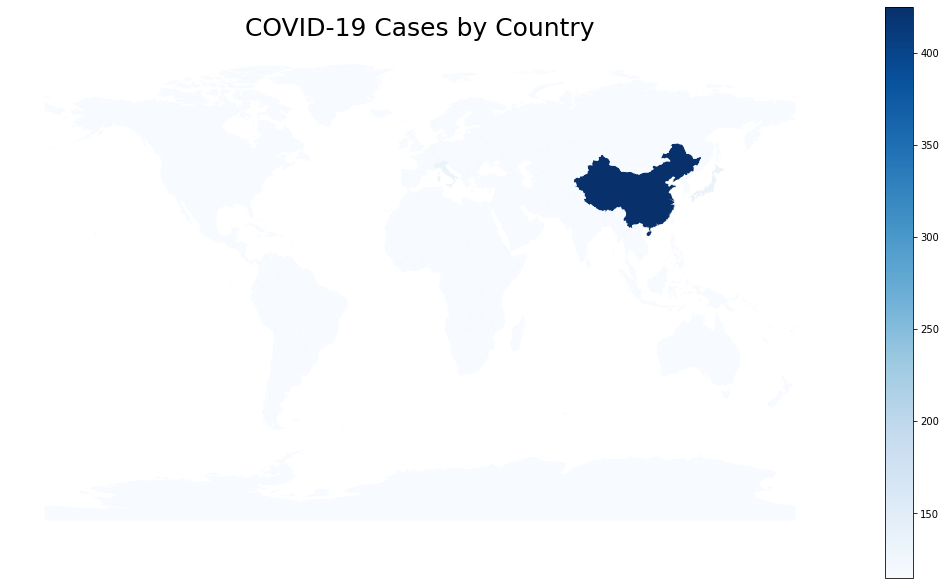

In [0]:
vmax = 425
vmin = 115
fig, ax = plt.subplots(1, figsize=(12, 4))
ax.axis("off")
finalGraph = map_counts.plot(cmap="Blues", column='Number of Cases', linewidth=0.001, ax=ax, edgecolor="0.5")
finalGraph.set_aspect(aspect=1.26)
plt.rcParams['figure.figsize'] = (20,20)

slider = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sliderArray = []
colorBar = fig.colorbar(slider)
ax.set_title('COVID-19 Cases by Country', fontdict={'fontsize': '25', 'fontweight' : '3'})

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)